In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [8]:
file_path = 'C:/Users/ghodrati/Documents/GitHub/prosperity/Laya/round-3-island-data-bottle/trades_round_3_day_0_nn.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and some basic information
data_info = data.info()
data_head = data.head()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   timestamp;buyer;seller;symbol;currency;price;quantity  3855 non-null   object
dtypes: object(1)
memory usage: 30.2+ KB


,timestamp;buyer;seller;symbol;currency;price;quantity
count,3855
unique,3855
top,0;;;CHOCOLATE;SEASHELLS;8001.0;8
freq,1


In [9]:
# Split the column into multiple columns using ';' as the separator
df = data['timestamp;buyer;seller;symbol;currency;price;quantity'].str.split(';', expand=True)

# Rename the columns appropriately
df.columns = ['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price', 'quantity']

# Convert numeric columns to appropriate data types
df['timestamp'] = pd.to_numeric(df['timestamp'])
df['price'] = pd.to_numeric(df['price'])
df['quantity'] = pd.to_numeric(df['quantity'])

# Display the updated DataFrame
df.info(), df.head(),
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3855 non-null   int64  
 1   buyer      3855 non-null   object 
 2   seller     3855 non-null   object 
 3   symbol     3855 non-null   object 
 4   currency   3855 non-null   object 
 5   price      3855 non-null   float64
 6   quantity   3855 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 210.9+ KB
           timestamp         price     quantity
count    3855.000000   3855.000000  3855.000000
mean   501744.176394  18083.116213     5.345006
std    287510.278802  22676.464969     2.717409
min         0.000000   3983.000000     1.000000
25%    258250.000000   4038.000000     3.000000
50%    500200.000000   8029.000000     5.000000
75%    753950.000000  14735.000000     7.000000
max    999800.000000  71569.000000    12.000000


In [15]:
alpha = 0.2

# Group by 'symbol' and apply the exponential moving average on the 'price' column using time-based weights
df['ema_price'] = df.groupby('symbol').apply(
    lambda x: x['price'].ewm(alpha=alpha, adjust=False).mean()
).reset_index(level=0, drop=True)

# Let's take a look at the DataFrame with the new moving average prices
df.head()

,timestamp,symbol,currency,price,quantity,time_weighted_price,ema_price
0,0,CHOCOLATE,SEASHELLS,8001.0,8,8001.0,8001.0
1,0,ROSES,SEASHELLS,15001.0,3,15001.0,15001.0
2,200,ROSES,SEASHELLS,15000.0,3,15000.8,15000.8
3,500,STRAWBERRIES,SEASHELLS,3999.0,10,3999.0,3999.0
4,1000,GIFT_BASKET,SEASHELLS,71360.0,2,71360.0,71360.0


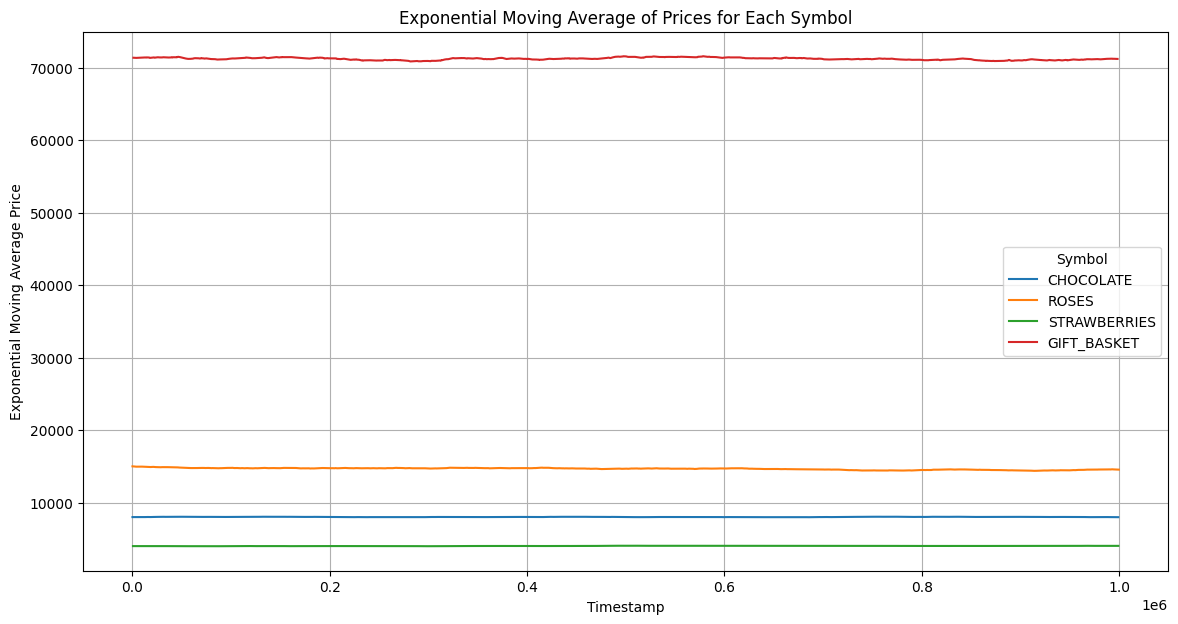

In [18]:
plt.figure(figsize=(14, 7))

for symbol in df['symbol'].unique():
    subset = df[df['symbol'] == symbol]
    # plt.plot(subset['timestamp'], subset['time_weighted_price'], label=symbol)
    plt.plot(subset['timestamp'], subset['price'], label=symbol)

plt.title('Exponential Moving Average of Prices for Each Symbol')
plt.xlabel('Timestamp')
plt.ylabel('Exponential Moving Average Price')
plt.legend(title='Symbol')
plt.grid(True)
plt.show()

In [19]:
df.head()

,timestamp,symbol,currency,price,quantity,time_weighted_price,ema_price
0,0,CHOCOLATE,SEASHELLS,8001.0,8,8001.0,8001.0
1,0,ROSES,SEASHELLS,15001.0,3,15001.0,15001.0
2,200,ROSES,SEASHELLS,15000.0,3,15000.8,15000.8
3,500,STRAWBERRIES,SEASHELLS,3999.0,10,3999.0,3999.0
4,1000,GIFT_BASKET,SEASHELLS,71360.0,2,71360.0,71360.0


In [ ]:
## basket is = 4 CH, 2 ST, 1 Ro